# Exploratory Data Analysis 
> This will show us how we can do EDA using python 
## Three important steps to keep in mind are:
---- 
 1- Understand the data \
 2- Clean the data \
 3- Find a relationship between data

In [2]:
# important libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
kashti= pd.read_csv('Titanic.csv')
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [4]:
ks= kashti

In [5]:
# data set details
ks.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
ks.shape

(891, 16)

In [7]:
ks.tail()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [8]:
ks.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
ks['Unnamed: 0'].mean()

445.0

In [10]:
# Unique Values 
ks.nunique()

Unnamed: 0     891
survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [11]:
# column names 
ks.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [12]:
ks['sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
ks['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [14]:
ks['class'].unique()

array(['Third', 'First', 'Second'], dtype=object)

In [15]:
# Multiple Unique Values
pd.unique(ks[['sex','class','who']].values.ravel())

array(['male', 'Third', 'man', 'female', 'First', 'woman', 'child',
       'Second'], dtype=object)

In [16]:
pd.unique(ks[['sex','class','who']].values.ravel('k'))

array(['male', 'female', 'Third', 'First', 'Second', 'man', 'woman',
       'child'], dtype=object)

## Cleaning and Filtering the data


In [17]:
# find missing values inside 
ks.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [18]:
# Removing missing value column (cleaning data)
ks_clean=ks.drop(["deck"],axis=1)
ks_clean.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [19]:
ks_clean.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [20]:
ks_clean.shape

(891, 15)

In [21]:
891-177-2

712

In [22]:
ks_clean=ks_clean.dropna()

In [23]:
ks_clean.isnull().sum()

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [24]:
ks.shape

(891, 16)

In [25]:
ks_clean.shape

(712, 15)

In [26]:
ks_clean['who'].value_counts()

man      413
woman    216
child     83
Name: who, dtype: int64

In [27]:
ks_clean['sex'].value_counts()

male      453
female    259
Name: sex, dtype: int64

In [28]:
ks.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
ks_clean.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,447.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,444.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,676.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,890.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [30]:
ks_clean.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone'],
      dtype='object')

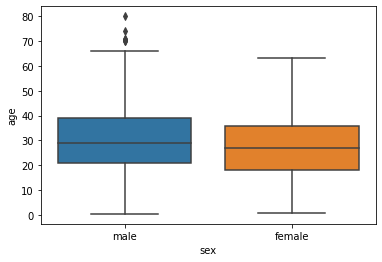

In [31]:
sns.boxplot(x='sex',y='age',data=ks_clean)
plt.show()

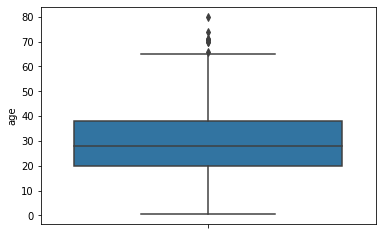

In [32]:
sns.boxplot(y='age',data=ks_clean)
plt.show()

c:\Users\Muhammad Mudassir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


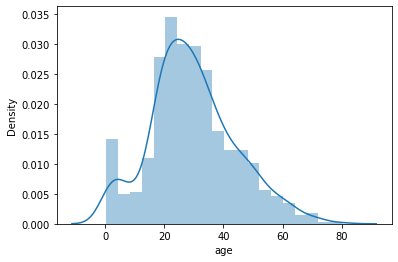

In [33]:
sns.distplot(ks_clean['age'])
plt.show()

In [34]:
# How to remove out-liers 
ks_clean['age'].mean()

29.64209269662921

In [42]:
ks_clean=ks_clean[ks_clean['age']<65]


In [43]:
ks_clean.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


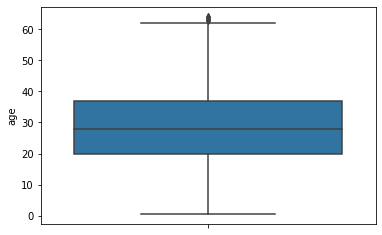

In [44]:
sns.boxplot(y='age',data=ks_clean)
plt.show()

In [45]:
ks_clean=ks_clean[ks_clean['age']<63]
ks_clean.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


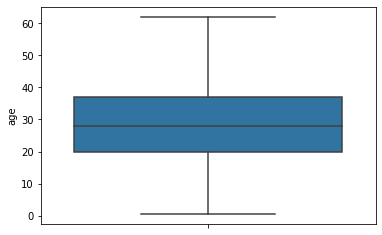

In [46]:
sns.boxplot(y='age',data=ks_clean)
plt.show()

c:\Users\Muhammad Mudassir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


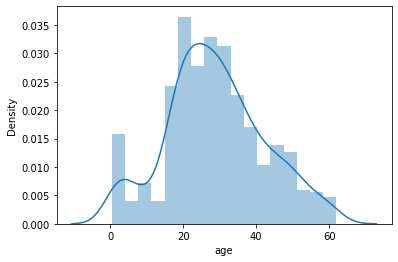

In [53]:
sns.distplot(ks_clean['age'])
plt.show()

In [51]:
ks_clean['age'].mean()

28.81444763271162

<AxesSubplot:>

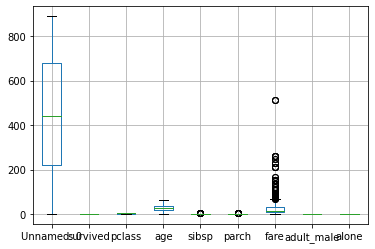

In [54]:
ks_clean.boxplot()

In [57]:
ks_clean=ks_clean[ks_clean['fare']<300]
ks_clean['fare'].mean()

32.24839625360231

<AxesSubplot:>

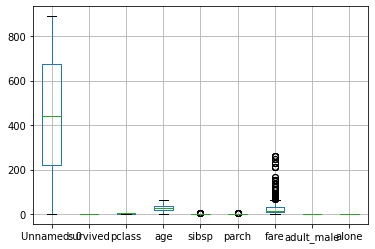

In [58]:
ks_clean.boxplot()

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sibsp'}>,
        <AxesSubplot:title={'center':'parch'}>],
       [<AxesSubplot:title={'center':'fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

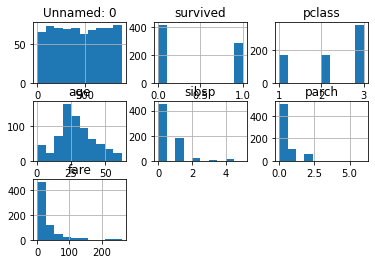

In [59]:
ks_clean.hist()

<AxesSubplot:>

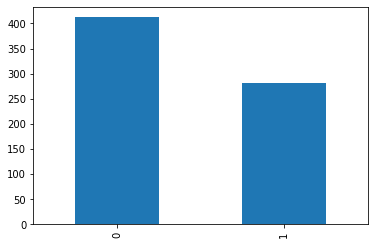

In [60]:
pd.value_counts(ks_clean['survived']).plot.bar()

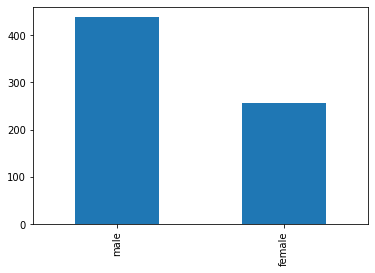

In [61]:
pd.value_counts(ks_clean['sex']).plot.bar()
plt.show()

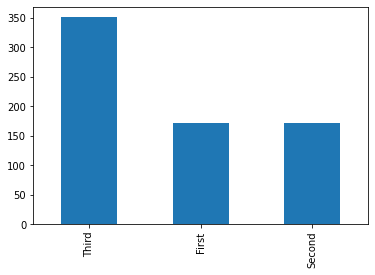

In [62]:
pd.value_counts(ks_clean['class']).plot.bar()
plt.show()

In [64]:
ks.groupby(['sex','class']).mean()

Unnamed: 0  survived  pclass        age     sibsp     parch  \
sex    class                                                                 
female First   468.212766  0.968085     1.0  34.611765  0.553191  0.457447   
       Second  442.105263  0.921053     2.0  28.722973  0.486842  0.605263   
       Third   398.729167  0.500000     3.0  21.750000  0.895833  0.798611   
male   First   454.729508  0.368852     1.0  41.281386  0.311475  0.278689   
       Second  446.962963  0.157407     2.0  30.740707  0.342593  0.222222   
       Third   454.515850  0.135447     3.0  26.507589  0.498559  0.224784   

                     fare  adult_male     alone  
sex    class                                     
female First   106.125798    0.000000  0.361702  
       Second   21.970121    0.000000  0.421053  
       Third    16.118810    0.000000  0.416667  
male   First    67.226127    0.975410  0.614754  
       Second   19.741782    0.916667  0.666667  
       Third    12.661633    0.919308  0.760807

In [67]:
ks_clean.groupby(['sex','class']).mean()

Unnamed: 0  survived  pclass        age     sibsp     parch  \
sex    class                                                                 
female First   483.283951  0.962963     1.0  33.876543  0.555556  0.518519   
       Second  441.905405  0.918919     2.0  28.722973  0.500000  0.621622   
       Third   404.732673  0.455446     3.0  21.341584  0.831683  0.960396   
male   First   446.912088  0.406593     1.0  38.993626  0.395604  0.296703   
       Second  451.329897  0.154639     2.0  29.972474  0.381443  0.247423   
       Third   454.680000  0.152000     3.0  25.987680  0.496000  0.260000   

                     fare  adult_male     alone  
sex    class                                     
female First   104.014147    0.000000  0.358025  
       Second   21.951070    0.000000  0.405405  
       Third    15.937625    0.000000  0.366337  
male   First    61.517307    0.967033  0.527473  
       Second   21.331959    0.907216  0.628866  
       Third    12.215548    0.888000  0.736000

In [72]:
ks_clean=ks_clean.drop('Unnamed: 0',axis=1)
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


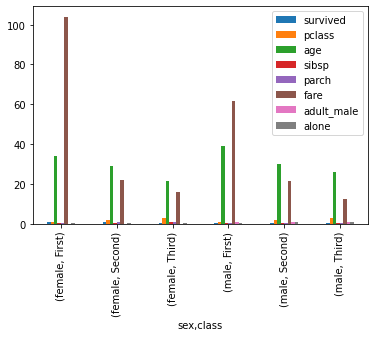

In [73]:
ks_clean.groupby(['sex','class']).mean().plot.bar()
plt.show()

In [74]:
ks_clean.groupby(['sex','class','who']).mean()

survived  pclass        age     sibsp     parch  \
sex    class  who                                                      
female First  child  0.666667     1.0  10.333333  0.666667  1.666667   
              woman  0.974359     1.0  34.782051  0.551282  0.474359   
       Second child  1.000000     2.0   6.600000  0.700000  1.300000   
              woman  0.906250     2.0  32.179688  0.468750  0.515625   
       Third  child  0.533333     3.0   7.100000  1.533333  1.100000   
              woman  0.422535     3.0  27.359155  0.535211  0.901408   
male   First  child  1.000000     1.0   5.306667  0.666667  2.000000   
              man    0.386364     1.0  40.142045  0.386364  0.238636   
       Second child  1.000000     2.0   2.258889  0.888889  1.222222   
              man    0.068182     2.0  32.806818  0.329545  0.147727   
       Third  child  0.321429     3.0   6.515000  2.821429  1.321429   
              man    0.130631     3.0  28.443694  0.202703  0.126126   

                           fare  adult_male     alone  
sex    class  who                                      
female First  child  160.962500         0.0  0.000000  
              woman  101.823826         0.0  0.371795  
       Second child   29.240000         0.0  0.000000  
              woman   20.812175         0.0  0.468750  
       Third  child   19.023753         0.0  0.166667  
              woman   14.633627         0.0  0.450704  
male   First  child  117.802767         0.0  0.000000  
              man     59.598484         1.0  0.545455  
       Second child   27.306022         0.0  0.000000  
              man     20.720975         1.0  0.693182  
       Third  child   27.716371         0.0  0.035714  
              man     10.260489         1.0  0.824324

## Relationship in data

In [76]:
corr_ks_clean=ks_clean.corr()

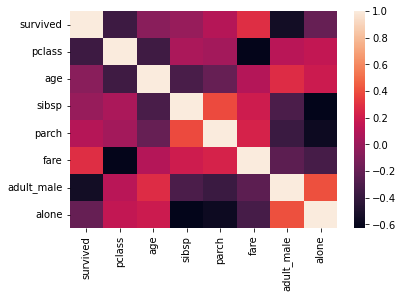

In [78]:
sns.heatmap(corr_ks_clean)
plt.show()

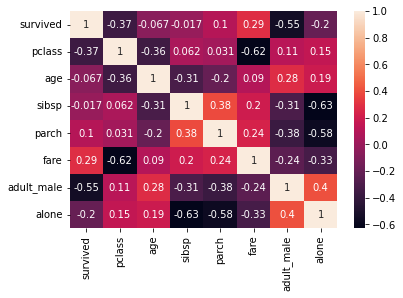

In [81]:
sns.heatmap(corr_ks_clean, annot=True)
plt.show()

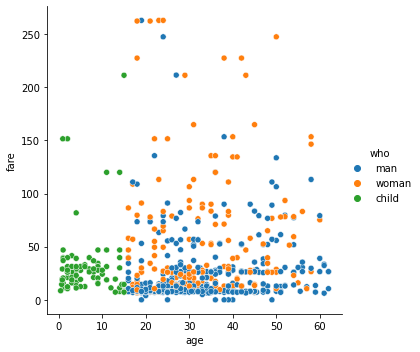

In [83]:
sns.relplot(x='age',y='fare',hue='who',data=ks_clean)
plt.show()

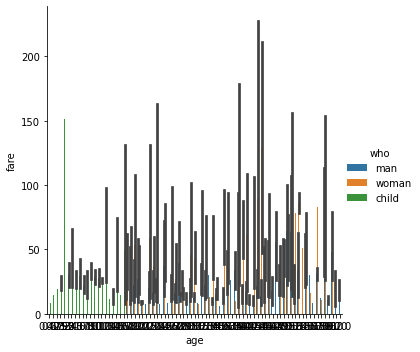

In [84]:
sns.catplot(x='age',y='fare',hue='who',kind='bar' ,data=ks_clean)
plt.show()

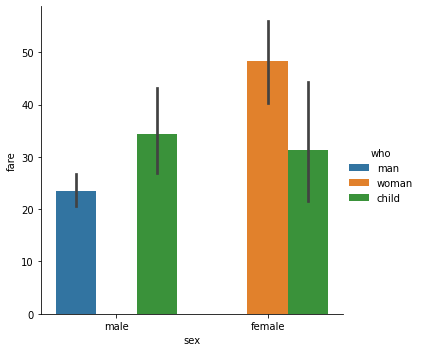

In [87]:
sns.catplot(x='sex',y='fare',hue='who' ,data=ks_clean,kind='bar')
plt.show()

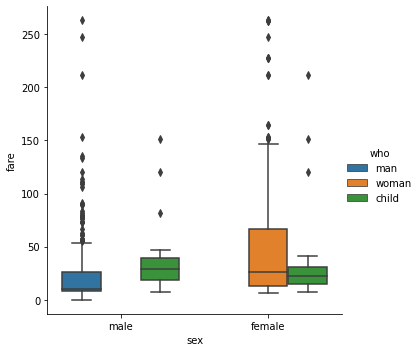

In [88]:
sns.catplot(x='sex',y='fare',hue='who' ,data=ks_clean,kind='box')
plt.show()

c:\Users\Muhammad Mudassir\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


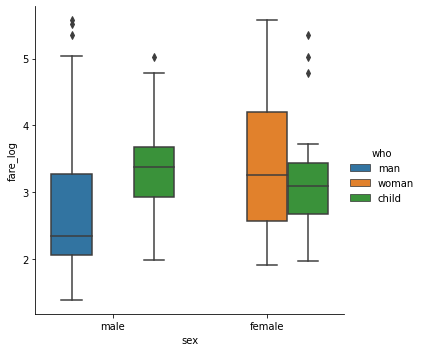

In [95]:
ks_clean['fare_log']=np.log(ks_clean['fare'])
sns.catplot(x='sex',y='fare_log',hue='who' ,data=ks_clean,kind='box')
plt.show()

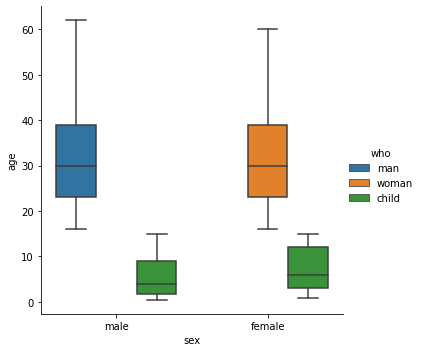

In [89]:
sns.catplot(x='sex',y='age',hue='who' ,data=ks_clean,kind='box')
plt.show()

c:\Users\Muhammad Mudassir\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Muhammad Mudassir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


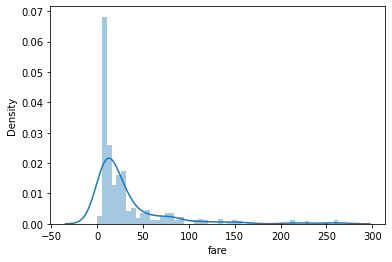

In [91]:
ks_clean['fare_log']=np.log(ks_clean['fare'])
sns.distplot(ks_clean['fare'])
plt.show()

In [93]:
# log transformation
ks_clean['fare_log']=np.log(ks_clean['fare'])
ks_clean.head()

c:\Users\Muhammad Mudassir\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_log
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.981001
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,4.266662
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,2.070022
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,3.972177
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,2.085672


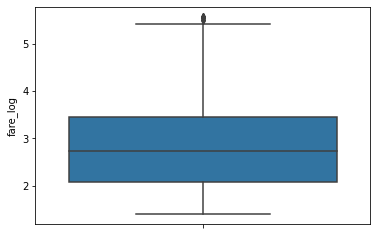

In [94]:
sns.boxplot(y='fare_log',data=ks_clean)
plt.show()